In [46]:
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data:
For this assignment, assume input is CSV and write a function that can read a csv into python

In [47]:
def read_data(file_name, index_col = None):
    data = pd.read_csv(file_name, index_col = index_col)
    
    return data 

In [48]:
data = read_data("credit-data.csv", "PersonID")
X = data.drop(['SeriousDlqin2yrs'], 1)
#X = preprocessing.scale(X)
#X = X[:-forecast_out]
#df.dropna(inplace=True)
y = data['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
data = X_train.join(y_train)
data.head()


,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
PersonID,,,,,,,,,,,,
126669,0.000429,68,60657,0,0.076225,8041.0,11,0,1,0,0.0,0
130360,0.026093,41,60637,0,487.000000,NaN,7,0,0,0,0.0,0
34077,0.027393,61,60625,0,0.192655,14185.0,14,0,2,0,1.0,0
110061,0.042192,64,60657,0,0.687075,9260.0,26,0,3,0,0.0,0
69540,0.079137,44,60629,0,0.371554,12802.0,7,0,2,0,3.0,0


# Explore Data: 
You can use the code you wrote for assignment 1 here to generate distributions and data summaries.

In [49]:
data.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,9.630300e+04,120000.000000,120000.000000,120000.000000,120000.000000,116839.000000,120000.000000
mean,6.453018,52.302942,60648.842250,0.422375,351.212069,6.679488e+03,8.454558,0.268025,1.016058,0.242142,0.758077,0.066667
std,270.052206,14.794703,56.791841,4.209179,2105.714449,1.452129e+04,5.143888,4.186699,1.114515,4.172078,1.115015,0.249445
min,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029816,41.000000,60625.000000,0.000000,0.174893,NaN,5.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,0.153891,52.000000,60629.000000,0.000000,0.366449,NaN,8.000000,0.000000,1.000000,0.000000,NaN,0.000000
75%,0.558727,63.000000,60644.000000,0.000000,0.863674,NaN,11.000000,0.000000,2.000000,0.000000,NaN,0.000000
max,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,57.000000,98.000000,29.000000,98.000000,13.000000,1.000000


In [50]:
# find average details depending on whethere the person is a serious delinquent
data.groupby("SeriousDlqin2yrs").mean().transpose()

SeriousDlqin2yrs,0,1
RevolvingUtilizationOfUnsecuredLines,6.623731,4.063047
age,52.756062,45.959250
zipcode,60648.742375,60650.240500
NumberOfTime30-59DaysPastDueNotWorse,0.284241,2.356250
DebtRatio,355.362149,293.110959
MonthlyIncome,6763.053639,5559.394107
NumberOfOpenCreditLinesAndLoans,8.495411,7.882625
NumberOfTimes90DaysLate,0.139179,2.071875
NumberRealEstateLoansOrLines,1.018589,0.980625
NumberOfTime60-89DaysPastDueNotWorse,0.130509,1.805000


As we can see People  experienced 90 days past due delinquency or worse:
    - When they were younger (mean age = 45) vs older (mean age = 55)
    - Had lower debt ratio, income.

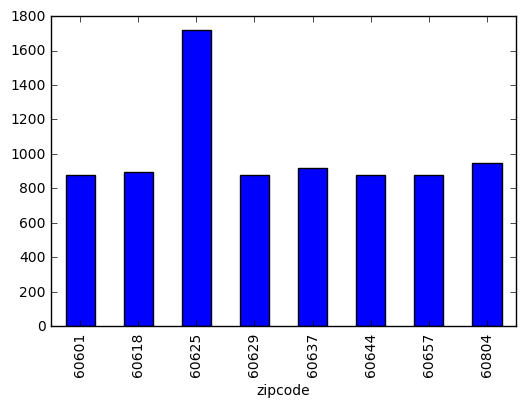

In [51]:
#Number of serious delinquents based on zipcodes
count_data = data[data["SeriousDlqin2yrs"] == 1].groupby(["zipcode"],axis = 0).count()["SeriousDlqin2yrs"]
count_data.plot(kind = "bar")

As we can see the number of delinquents is pretty much same in all areas except for 60625 (Lincon Park) where the number of people in their late 20s to early 40s is extremely large.



Graph of  age


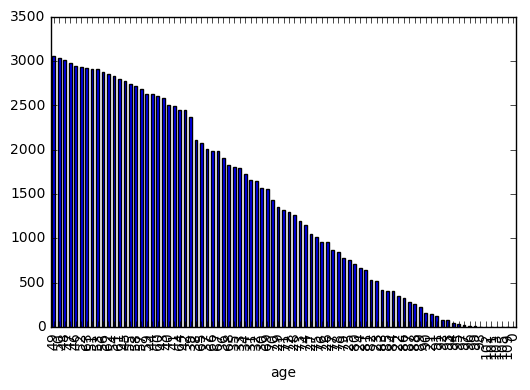



Graph of  NumberOfTime30-59DaysPastDueNotWorse


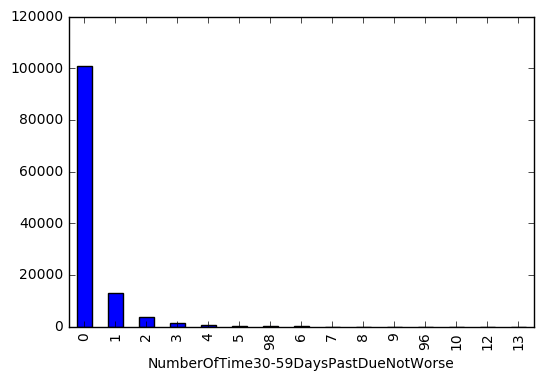



Graph of  NumberOfOpenCreditLinesAndLoans


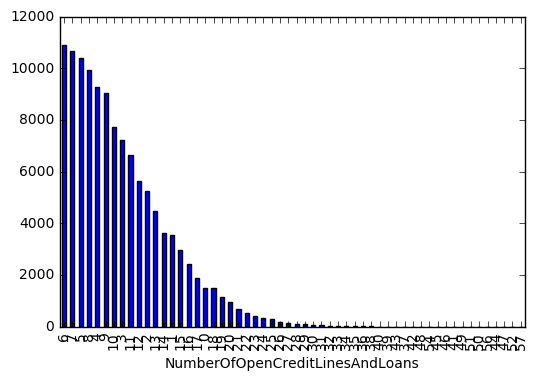



Graph of  NumberOfTimes90DaysLate


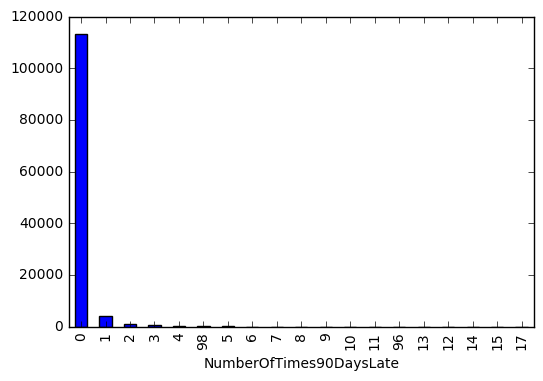



Graph of  NumberRealEstateLoansOrLines


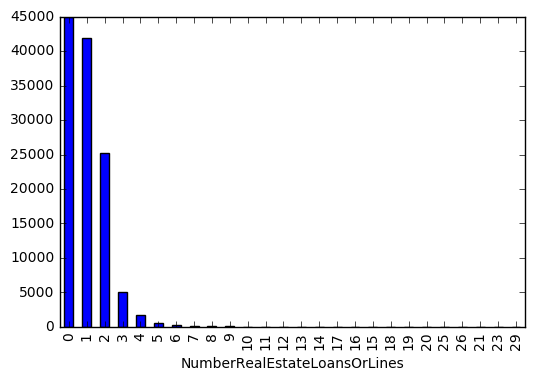



Graph of  NumberOfTime60-89DaysPastDueNotWorse


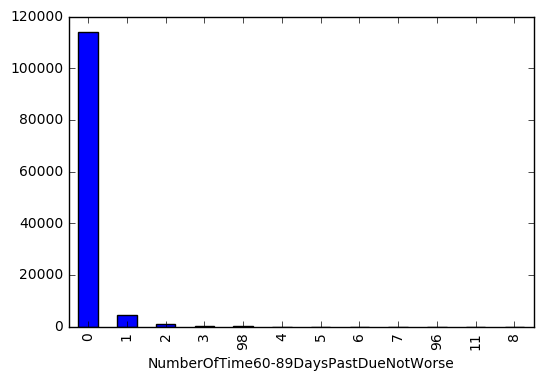



Graph of  NumberOfDependents


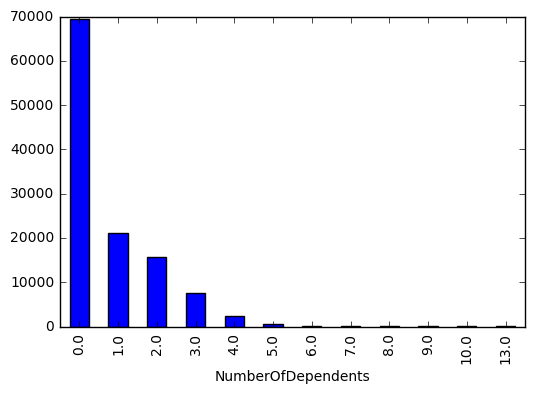

In [52]:
#plot bar chart
bar_chart_cols = ["age", "NumberOfTime30-59DaysPastDueNotWorse","NumberOfOpenCreditLinesAndLoans", 
"NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse",
                  "NumberOfDependents"]
plot_bar(data, bar_chart_cols)


As we can see from the graphs:
- age: doesnt give clean data. so we check histogram for it.
- NumberOfTime30-59DaysPastDueNotWorse: Almost noone is late between 30-60 days
- NumberOfOpenCreditLinesAndLoans:  doesnt give clean data. so we check histogram for it.
- NumberOfTimes90DaysLate: Almost noone has been more than 90 days late
- NumberRealEstateLoansOrLines: most people have 1 or lesser number of mortgage
- As we can see from NumberOfTime60-89DaysPastDueNotWorse, most people have not been 60-89 days past due but no worse in the last 2 years
- NumberOfDependents: Most of the people do not have any dependents




Graph of  NumberOfOpenCreditLinesAndLoans


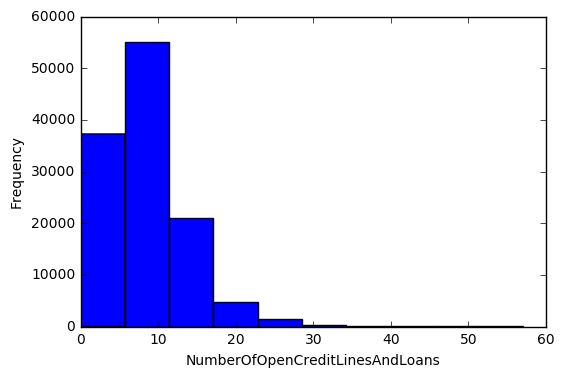



Graph of  RevolvingUtilizationOfUnsecuredLines


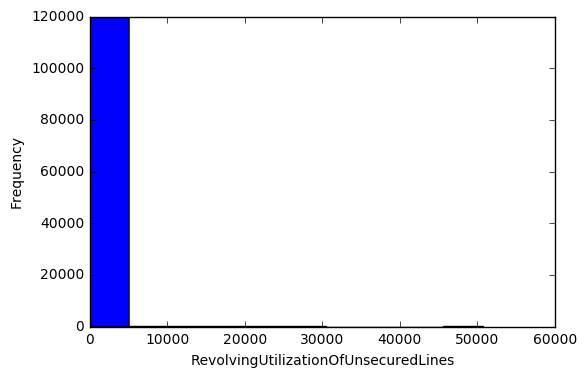



Graph of  DebtRatio


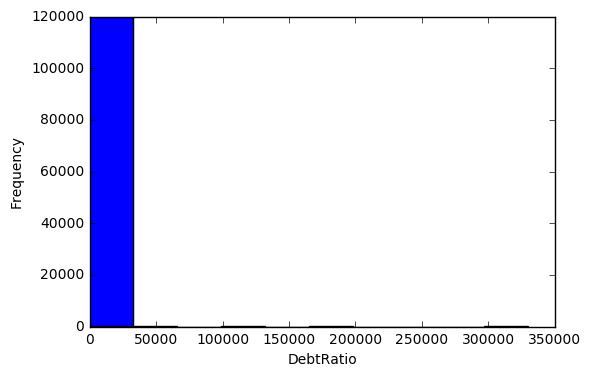



Graph of  MonthlyIncome


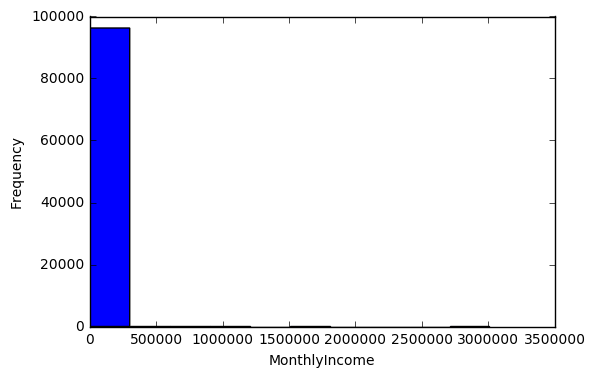



Graph of  age


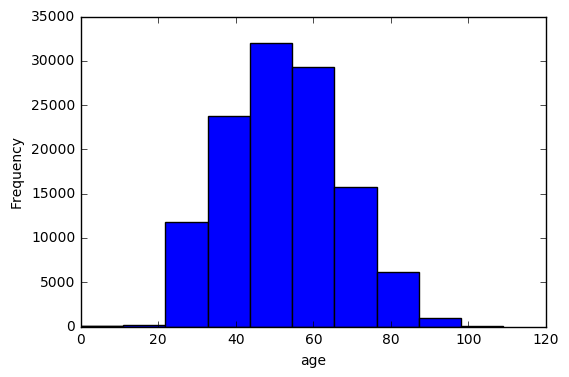

In [53]:
#Plot histograms
hist_cols = ["NumberOfOpenCreditLinesAndLoans","RevolvingUtilizationOfUnsecuredLines", "DebtRatio", "MonthlyIncome", "age"
]
plot_hist(data, hist_cols)


As we can see:
- There is dirty data for RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome. Hence we need to clean it before we can make much sense of it.
- Maximum number of people belong to 45-50 age group.
- most of the people have credit open lines between 5-15


In [54]:
def plot_hist(df,df_cols):
    for each in df_cols:
        print("\n")
        #df=data[each].value_counts()
        #meanval = int(data[[each]].mean())
        data[each].plot.hist(align = 'mid')
        print("Graph of ", each)
        plt.xlabel(each)
        #plt.ylabel("Num_people")
        plt.show()
        

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


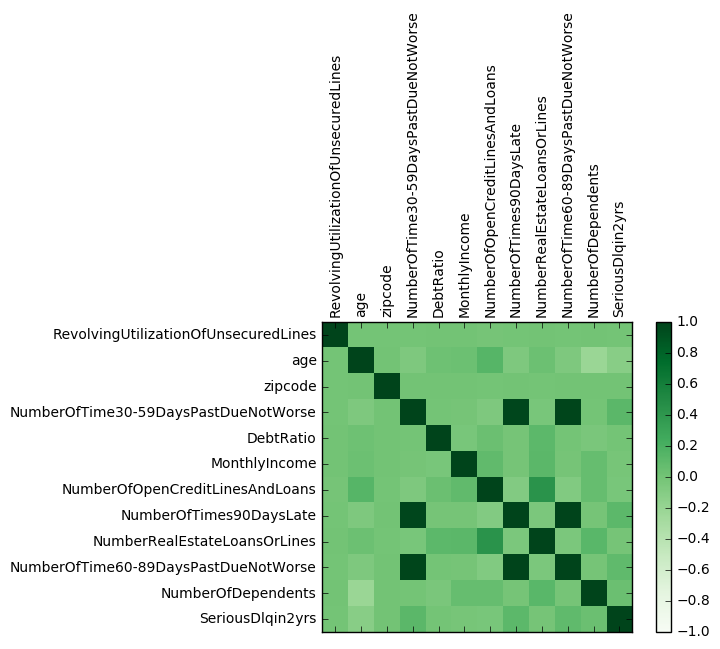

In [55]:
#plot correlation between different data
plot_corr(data)


Moderate positive correlation between our target variable SeriousDlqin2yrs and:
- NumberOfTime30-59DaysPastDueNotWorse
- NumberOfTime60-89DaysPastDueNotWorse
- NumberOfTime90DaysLate

Small positive correlation between our target variable SeriousDlqin2yrs and:
- NumberOfTime30-59DaysPastDueNotWorse
- NumberOfTime60-89DaysPastDueNotWorse
- NumberOfDependents

Small negative correlation between our target variable SeriousDlqin2yrs and:
- age

In [56]:
def plot_bar(df,df_cols):
    for each in df_cols:
        print("\n")
        df=data[each].value_counts()
        df.plot.bar()
        print("Graph of ", each)
        plt.xlabel(each)
        #plt.ylabel("No_people")
        plt.show()
        

In [57]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr, vmin=-1, vmax=1, cmap = plt.cm.Greens)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);
    ticks = np.arange(0,9,1)
    plt.legend(prop={'size':5})
    plt.show()    

In [58]:
#Doesnt work correctly.
def plot_bar_notworking(df):
    count = 0
    for column in data.columns:
        #max_range = len(data[[columns]])
        #y = [x[0] for x in data[[columns]].values.tolist()]
        w = 0.5
        count = count+1
        plt.bar(np.arange(0,data.shape[0])+ (w*count), list(data[column]), width = w, align='center', color = np.random.rand(3,1), label = column)
        plt.xticks(range(data.shape[0]))
    plt.legend(prop={'size':5})
    #plt.show()

# Pre-Process Data: 
For this assignment, you can limit this to filling in missing values for the variables that have missing values. You can use any simple method to do it (use mean to fill in missing values).

In [59]:
#from datagotham
def print_null_freq(df):
    """
    for a given DataFrame, calculates how many values for 
    each variable is null and prints the resulting table to stdout
    """
    df_lng = pd.melt(df)
    null_variables = df_lng.value.isnull()
    return pd.crosstab(df_lng.variable, null_variables)

In [60]:
print_null_freq(data)

value,False,True
variable,,
DebtRatio,120000,0
MonthlyIncome,96303,23697
NumberOfDependents,116839,3161
NumberOfOpenCreditLinesAndLoans,120000,0
NumberOfTime30-59DaysPastDueNotWorse,120000,0
NumberOfTime60-89DaysPastDueNotWorse,120000,0
NumberOfTimes90DaysLate,120000,0
NumberRealEstateLoansOrLines,120000,0
RevolvingUtilizationOfUnsecuredLines,120000,0


In [61]:
# Income data correction
#For the people with age greater than 75, income assumed = 0
#data.loc[data.age>75,["MonthlyIncome"]].fillna(0)
#For the rest of the bins fill it by their individual bin means
#data.loc[data.age.isin([60,75]),["MonthlyIncome"]].fillna(data.loc[data.age.isin([60,75]),["MonthlyIncome"]].mean())



In [62]:
#Fill income by the median as its more representative
data["MonthlyIncome"] = data["MonthlyIncome"].fillna(data["MonthlyIncome"].median())
#Fill Num of dependent by the mode  as its more representative
data["NumberOfDependents"] = data["NumberOfDependents"].fillna(0)

# Generate Features/Predictors: 
For this assignment, you should write one function that can discretize a continuous variable and one function that can take a categorical variable and create binary/dummy variables from it. Apply them to at least one variable each in this data.

In [63]:
def get_discrete_var(df, col_name, cuts):
    min_val = df.min()
    max_val = df.max()
    arr = np.arange(0, max_val + cuts, cuts)
    factor = pd.cut(df, arr)
    dumm = pd.get_dummies(factor, prefix = col_name)
    return dumm
#df[cont_var + dummy_code] = pd.qcut(data[cont_var], bucket_array)
#df = pd.get_dummies(df, columns=[cont_var + dummy_code])    

In [64]:
dumm_zip = pd.get_dummies(data["zipcode"])
dumm_age = get_discrete_var(data["age"],"dummy_age",10)
data = pd.concat([data,dumm_zip,dumm_age], axis = 1)

In [65]:
#Imputing for the test set.
X_test["MonthlyIncome"] = X_test["MonthlyIncome"].fillna(X_test["MonthlyIncome"].median())
X_test["NumberOfDependents"] = X_test["NumberOfDependents"].fillna(X_test["NumberOfDependents"].mean())
#Binning could have been done earlier
dumm_zip = pd.get_dummies(X_test["zipcode"])
dumm_age = get_discrete_var(X_test["age"],"dummy_age",10)
X_test = pd.concat([X_test,dumm_zip,dumm_age], axis = 1)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


# Build Classifier: 
For this assignment, select any classifier you feel comfortable with (Logistic Regression for example)

In [66]:
X_train = data.drop(['SeriousDlqin2yrs'], 1)
scalar = preprocessing.StandardScaler()
X_train['Income_scaled'] = scalar.fit_transform(X_train["MonthlyIncome"])
X_train["DebtRatio_scaled"] = scalar.fit_transform(X_train["DebtRatio"])
#X_test = scalar.fit_transform(X_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a sing

In [67]:
X_test['Income_scaled'] = scalar.fit_transform(X_test["MonthlyIncome"])
X_test["DebtRatio_scaled"] = scalar.fit_transform(X_test["DebtRatio"])


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a sing

In [68]:
#fitting for logistic regression
from sklearn.linear_model import LogisticRegression
def log_reg(X_train, y_train, features):
    model = LogisticRegression(penalty = 'l2', C = 1)
    return model.fit(X_train[features], y_train)
    

In [69]:
#temp1 = X_test.columns.values.tolist()
#temp2 = data.columns.values.tolist()
#[item for item in temp1 if item not in temp2]
#X_test.columns

In [70]:
# Finding best features
from sklearn.feature_selection import SelectKBest, f_classif
def find_best_k_features(X_train,y_train, k):
    # Perform feature selection
    selector = SelectKBest(f_classif, k=k)
    best_k = selector.fit(X_train, y_train)
    #X_new = selector.transform(X_train)
    #scores = selector.scores_
    
    mask = best_k.get_support() #list of booleans
    new_features = [] # The list of your K best features
    for bool, feature in zip(mask, X_train.columns.values.tolist()):
        if bool:
            new_features.append(feature)
    return new_features

In [71]:
find_best_k_features(X_train,y_train, 17)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [19 20] are constant.
  UserWarning)


['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'dummy_age_(20, 30]',
 'dummy_age_(30, 40]',
 'dummy_age_(40, 50]',
 'dummy_age_(50, 60]',
 'dummy_age_(60, 70]',
 'dummy_age_(70, 80]',
 'dummy_age_(80, 90]',
 'dummy_age_(90, 100]',
 'Income_scaled']

#From this we can see that the best features are 
['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents', 'dummy_age_(20, 30]', 'dummy_age_(30, 40]', 'dummy_age_(40, 50]', 'dummy_age_(50, 60]',
 'dummy_age_(60, 70]', 'dummy_age_(70, 80]', 'dummy_age_(80, 90]', 'dummy_age_(90, 100]', 'Income_scaled']
 
 So we take new features to be:
 features = ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents','Income_scaled']
 

In [72]:
 features = ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio_scaled', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents','Income_scaled']
all_features = X_train.columns.values.tolist()

In [73]:
model_all = log_reg(X_train,y_train, all_features)
model_top10 = log_reg(X_train,y_train, features)
#fitting for logistic regression for best 10 features


# Evaluate Classifier: 
you can use any metric you choose for this assignment (accuracy is the easiest one). Feel free to evaluate it on the same data you built the model on (this is not a good idea in general but for this assignment, it is fine). We haven't covered models and evaluation yet, so don't worry about creating validation sets or cross-validation. 



In [74]:
from sklearn.metrics import accuracy_score


In [75]:
#Help taken from https://www.youtube.com/watch?v=yLsKZTWyEDg
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y

In [77]:
# How accurate our model utilizing all features is?
y_base_rate = base_rate_model(X_test)
print("Base case accuracy = ",accuracy_score(y_test, y_base_rate))

# Model Accuracy with all features
y_pred_all = model_all.predict(X_test)
print("Model accuracy with all features = ", accuracy_score(y_test, y_pred_all))

# Model Accuracy with top10 features
y_pred_top10 = model_top10.predict(X_test[features])
print("Model accuracy with top 10 features = ", accuracy_score(y_test, y_pred_top10))
      


Base case accuracy =  0.932466666667
Model accuracy with all features =  0.932266666667
Model accuracy with top 10 features =  0.932833333333


# Base rate accuracy is 93%. It is as good our model!

So we can see that accuracy score is not the best way to test for accuracy.
Hence we will try something else like AUC 

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [79]:
#Base ROC AUC prediction
base_roc_auc = roc_auc_score(y_test, y_base_rate)
print("Base ROC AUC score = %2.2f" %base_roc_auc)
print(classification_report(y_test, y_base_rate))

#Model prediction with all features
predict_roc_auc = roc_auc_score(y_test, y_pred_all)
print("Predicted ROC AUC score using all features = %2.2f" %base_roc_auc)
print(classification_report(y_test, y_pred_all))

#Model prediction with top 10 features
predict_roc_auc = roc_auc_score(y_test, y_pred_top10)
print("Predicted ROC AUC score using all features = %2.2f" %base_roc_auc)
print(classification_report(y_test, y_pred_top10))

Base ROC AUC score = 0.50
             precision    recall  f1-score   support

          0       0.93      1.00      0.97     27974
          1       0.00      0.00      0.00      2026

avg / total       0.87      0.93      0.90     30000

Predicted ROC AUC score using all features = 0.50
             precision    recall  f1-score   support

          0       0.93      1.00      0.96     27974
          1       0.20      0.00      0.00      2026

avg / total       0.88      0.93      0.90     30000

Predicted ROC AUC score using all features = 0.50
             precision    recall  f1-score   support

          0       0.93      1.00      0.97     27974
          1       0.56      0.03      0.05      2026

avg / total       0.91      0.93      0.90     30000



C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [80]:
from sklearn.metrics import roc_curve

In [81]:
#https://github.com/yhat/DataGotham2013/blob/master/notebooks/8%20-%20Fitting%20and%20Evaluating%20Your%20Model.ipynb
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

Plotting ROC for all features


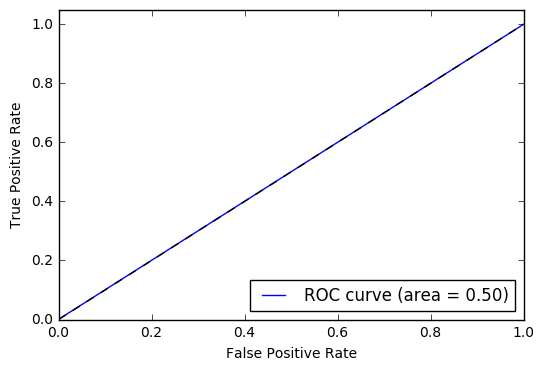

Plotting ROC for top 10 features


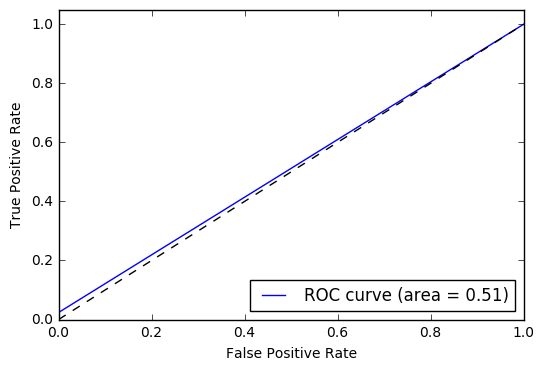

In [82]:
print("Plotting ROC for all features")
plot_roc(y_test, y_pred_all)
print("Plotting ROC for top 10 features")
plot_roc(y_test, y_pred_top10)